In [4]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob 
from skimage import io 
import random 
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

sys.path.append('../elpv-dataset/utils')
from elpv_reader import load_dataset
images, probs, types = load_dataset()
# Create a figure with two subplots
def displayTwoPlots(img1, img2, cmap1='gray',cmap2='gray'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.set_title('Original Image')
    ax1.imshow(images[0], cmap='gray')

    # Display the new image
    ax2.set_title('New Image')
    ax2.imshow(img2, cmap='gray')

    # Hide the axes and show the figure
    ax1.axis('off')
    ax2.axis('off')
    plt.show()

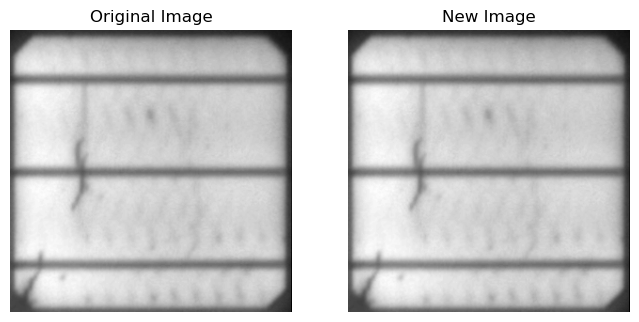

In [4]:
# Contrast stretching
b = images[0]

# Get height and h,w
min = 0
max = 255


stretched = ((b - np.min(b)) / (np.max(b) - np.min(b))) * (max - min) + min


displayTwoPlots(images[0],b)

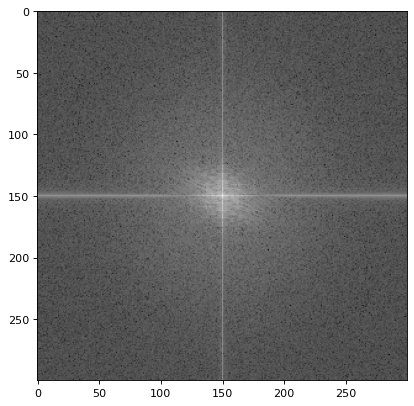

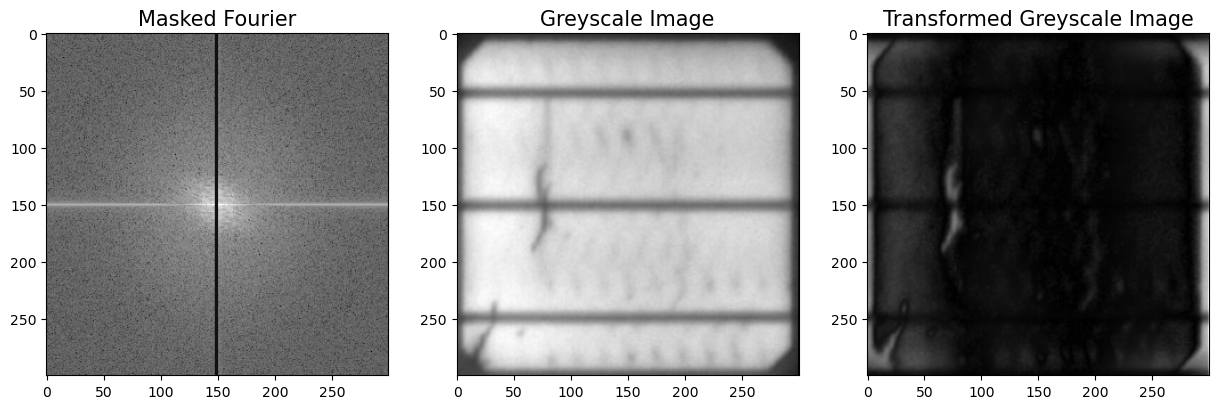

In [5]:
#Try some fourier removing of vertical df/dx
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(image))
    dark_image_grey_fourier[:225, 148:151] = i
    dark_image_grey_fourier[-225:,148:151] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size)
    

img_fourier = np.fft.fftshift(np.fft.fft2(b))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(img_fourier)), cmap='gray')

fourier_masker_hor(images[0],1)





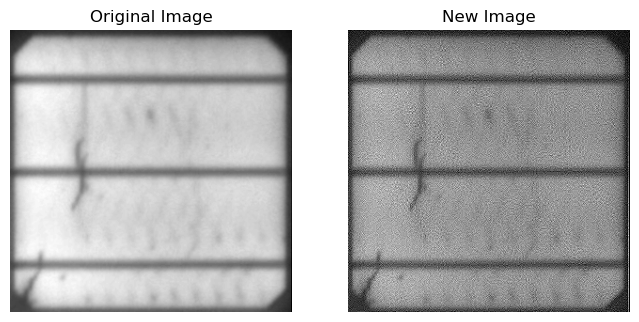

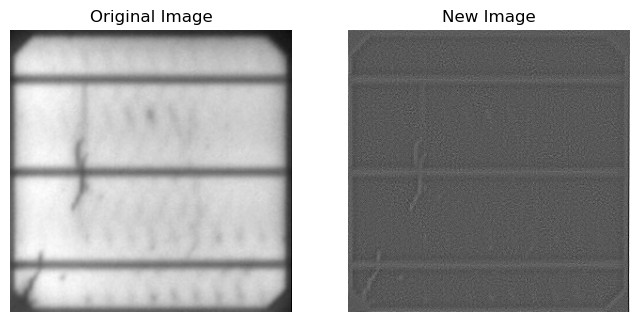

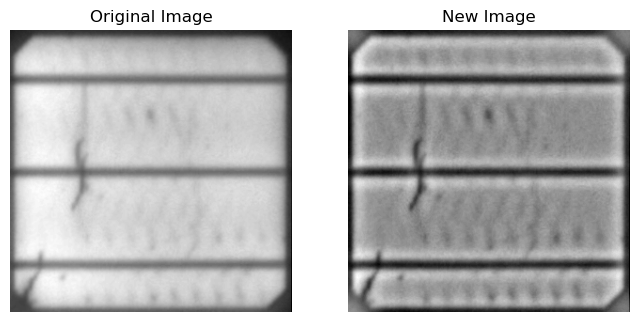

In [6]:
#sharpening the image
kernel = np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#img_sharp = cv2.filter2D(src=b,ddepth=1,kernel=kernel)
img_sharp = cv2.filter2D(b,-1,kernel)
for i in range(1):
    img_sharp = cv2.filter2D(img_sharp,-1,kernel)

displayTwoPlots(b,img_sharp)

# laplacian sharpening
img_sharp_lap = cv2.Laplacian(b, cv2.CV_64F) 
displayTwoPlots(b,img_sharp_lap)

# approach
aw = cv2.addWeighted(b, 4, cv2.blur(b, (30, 30)), -4, 128)
displayTwoPlots(b,aw)


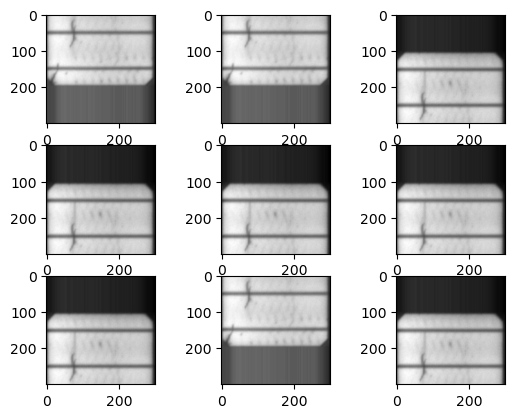

In [7]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()

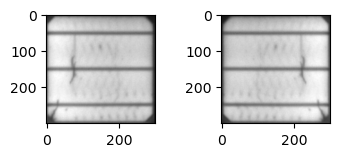

In [8]:
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(2):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()

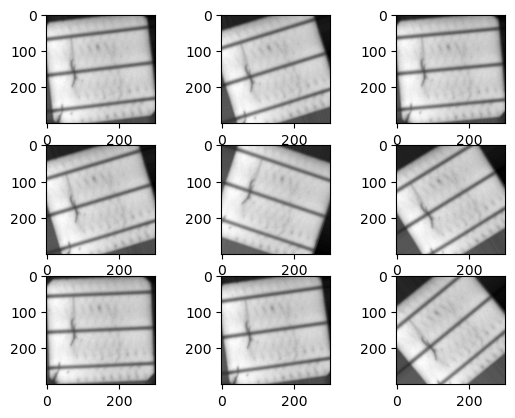

In [9]:
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# Lightness
datagen = ImageDataGenerator(rotation_range=45, fill_mode='nearest')
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()

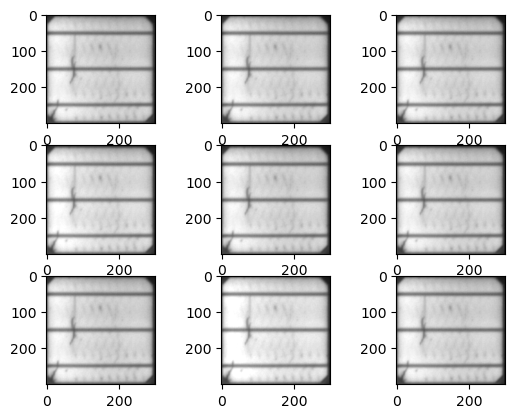

In [10]:
# load the image
img = images[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# Brightness
datagen = ImageDataGenerator(brightness_range=[0.1,3.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].squeeze().astype('uint8')  # Remove single-dimensional entries from the shape of an array
    # plot raw pixel data
    pyplot.imshow(image, cmap='gray')

# show the figure
pyplot.show()

# Apply modified images for more for more data for SVM

In [ ]:
import os
import csv

def replace_images_path(input_csv, output_csv, new_directory):
    with open(input_csv, 'r') as infile, open(output_csv, 'w', newline='') as outfile:
        reader = csv.reader(infile, delimiter='\t')
        writer = csv.writer(outfile, delimiter='\t')

        for row in reader:
            image_path, probability, image_type = row
            new_image_path = os.path.join(new_directory, os.path.basename(image_path))
            writer.writerow([new_image_path, probability, image_type])

# Replace 'your_new_directory' with the desired directory path
replace_images_path('../elpv-dataset/labels.csv', '../elpv-dataset/labels-.csv', 'your_new_directory')

### Histogram Equalisation

In [14]:
import os
import cv2

# using images from dataset

# Create a folder to save the processed images
output_folder = "../elpv-dataset/images"
os.makedirs(output_folder, exist_ok=True)

# Apply histogram equalization to each image and save it to the folder
for i, image in enumerate(images):
    # Convert to uint8 (assuming your image has values in the range [0, 255])
    image_uint8 = cv2.convertScaleAbs(image)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image_uint8)

    # Save the processed image to the output folder
    output_path = os.path.join(output_folder, f"cell{i+1:04d}.png")
    cv2.imwrite(output_path, equalized_image)

print("Histogram equalization and saving complete.")

4.8.1
Histogram equalization and saving complete.


### Fourier Transform

In [1]:
import cv2 as cv
import os
#image = images[2]

# Create a folder to save the processed images
output_folder = "../elpv-dataset/images"
os.makedirs(output_folder, exist_ok=True)

# Apply histogram equalization to each image and save it to the folder
for i, image in enumerate(images):
    # Convert to uint8 (assuming your image has values in the range [0, 255])
    image_uint8 = cv2.convertScaleAbs(image)

    # Apply Fast Fourier Transform
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    k=50
    fshift = dft_shift.copy()
    # fshift[:, 150] = 1
    half_image_size_x = image.shape[0]//2
    half_image_size_y = image.shape[1]//2


    kernel = np.array([1, 4, 0.1 , 4, 1])/10
    kernel_radius = len(kernel)//2

    fshift[:,half_image_size_y-kernel_radius:half_image_size_y +kernel_radius + 1] = kernel[None, :, None]*fshift[:,half_image_size_y-kernel_radius:half_image_size_y +kernel_radius + 1]

    fshift[half_image_size_y-kernel_radius:half_image_size_x +kernel_radius + 1, :] = kernel[:,None, None]*fshift[half_image_size_y-kernel_radius:half_image_size_y +kernel_radius + 1, :]



    window = np.log(np.linalg.norm(fshift, axis=-1))[150-k:150+k+1, 150-k:150+ k+1]
    main_axis = np.log(np.linalg.norm(fshift[:, 150], axis=-1)[150-k:150+k+1])


    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Normalize the result
    cv.normalize(img_back, img_back, 0, 255, cv.NORM_MINMAX)
    img_back = np.uint8(img_back)

    # Save the processed image to the output folder
    output_path = os.path.join(output_folder, f"cell{i+1:04d}.png")
    cv2.imwrite(output_path, img_back)

plt.imshow(img_back,cmap='gray')

NameError: name 'images' is not defined

### Sobel 

In [10]:
import cv2 as cv
import os

from sklearn import datasets
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np


# Create a folder to save the processed images
output_folder = "../elpv-dataset/images-sobel"
os.makedirs(output_folder, exist_ok=True)

# Apply histogram equalization to each image and save it to the folder
for i, image in enumerate(images):
    # Convert to uint8 (assuming your image has values in the range [0, 255])
    ascent = cv2.convertScaleAbs(image)
    ascent = cv.normalize(ascent, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    sobel_h = ndimage.sobel(ascent, 0)  # horizontal gradient
    sobel_v = ndimage.sobel(ascent, 1)  # vertical gradient
    magnitude = np.sqrt(sobel_h**2 + sobel_v**2)
    magnitude *= 255.0 / np.max(magnitude)  # normalization
    img_back = np.uint8(magnitude)

    # Save the processed image to the output folder
    output_path = os.path.join(output_folder, f"cell{i+1:04d}.png")
    cv2.imwrite(output_path, img_back)

plt.imshow(img_back,cmap='gray')

KeyboardInterrupt: 

In [ ]:
# Return Images oops
for i, image in enumerate(images):
     # Save the processed image to the output folder
    output_path = os.path.join(output_folder, f"cell{i+1:04d}.png")
    cv2.imwrite(output_path, images[i])